In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
base = pd.read_csv('Barcelona_Idealista.csv')
base

FileNotFoundError: ignored

Agora vamos ver quais são os tipos dos dados de nossas colunas

In [ ]:
print(base.dtypes)

Unnamed: 0       int64
city            object
district        object
neighborhood    object
condition       object
type            object
rooms            int64
area_m2          int64
lift            object
views           object
floor           object
prices           int64
dtype: object


#Análise das colunas numéricas

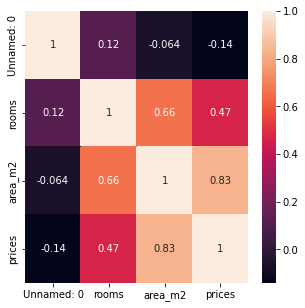

In [ ]:
figura = plt.figure(figsize=(5,5))

sns.heatmap(base.corr(), annot=True);

Podemos observar que há uma coluna inútil chamada "Unnamed: 0" que deve ser removida

In [ ]:
base = base.drop(columns=['Unnamed: 0'])
base

,city,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Barcelona,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Barcelona,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Barcelona,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Barcelona,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000
...,...,...,...,...,...,...,...,...,...,...,...
3260,Barcelona,Gràcia,la Vila de Gràcia,needs refurb,Flat,1,64,Yes,exterior,floor 1,295000
3261,Barcelona,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,needs refurb,Flat,3,99,No,exterior,floor 2,420000
3262,Barcelona,Les Corts,la Maternitat i Sant Ramon,needs refurb,Flat,4,127,Yes,exterior,floor 4,545000
3263,Barcelona,Sant Martí,el Parc i la Llacuna del Poblenou,needs refurb,Flat,3,64,No,exterior,ground floor,170000


#Análise das colunas de texto

##Cidade

Barcelona    3265
Name: city, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



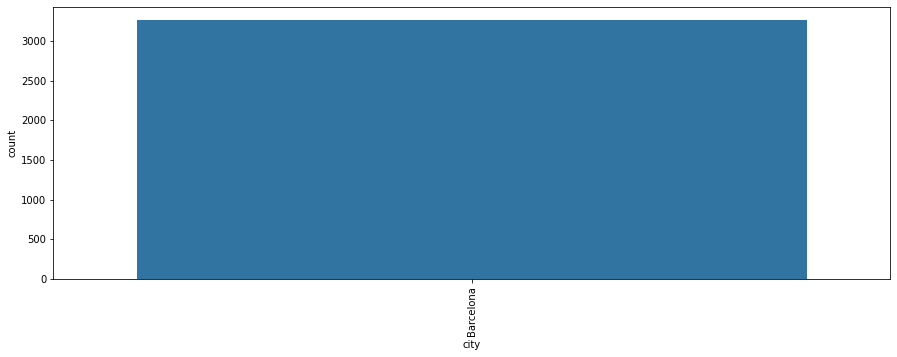

In [ ]:
print(base['city'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('city', data=base)
grafico.tick_params(axis='x', rotation=90)

Estamos analisando apenas propriedas em Barcelona, logo todas as entradas tem a mesma cidade, portanto essa coluna será inútil para nosso modelo e deve ser retirada

In [ ]:
base = base.drop(columns=['city'])
base

,district,neighborhood,condition,type,rooms,area_m2,lift,views,floor,prices
0,Eixample,la Dreta de l'Eixample,good condition,Flat,3,351,Yes,exterior,floor 1,2300000
1,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,good condition,Flat,5,298,Yes,exterior,floor 3,1750000
2,Eixample,Sant Antoni,good condition,Penthouse,2,90,Yes,exterior,floor 7,590000
3,Eixample,la Dreta de l'Eixample,good condition,Flat,2,130,Yes,exterior,floor 1,450000
4,Horta-Guinardó,Can Baró,good condition,Terraced,3,110,No,exterior,Multiple,430000
...,...,...,...,...,...,...,...,...,...,...
3260,Gràcia,la Vila de Gràcia,needs refurb,Flat,1,64,Yes,exterior,floor 1,295000
3261,Ciutat Vella,Sant Pere - Santa Caterina i la Ribera,needs refurb,Flat,3,99,No,exterior,floor 2,420000
3262,Les Corts,la Maternitat i Sant Ramon,needs refurb,Flat,4,127,Yes,exterior,floor 4,545000
3263,Sant Martí,el Parc i la Llacuna del Poblenou,needs refurb,Flat,3,64,No,exterior,ground floor,170000


##Distrito

Eixample               788
Sarrià-Sant Gervasi    519
Sant Martí             420
Ciutat Vella           340
Sants-Montjuïc         271
Les Corts              257
Horta-Guinardó         206
Gràcia                 205
Sant Andreu            155
Nou Barris             104
Name: district, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



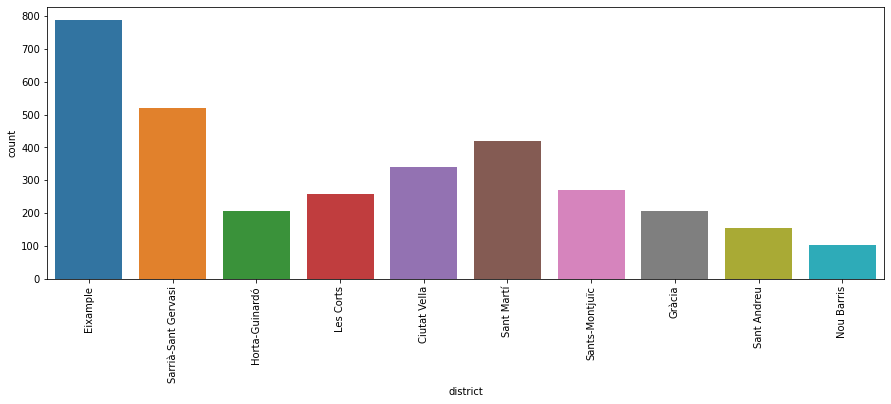

In [ ]:
print(base['district'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('district', data=base)
grafico.tick_params(axis='x', rotation=90)

Podemos ver que os distritos estão com um bom equilíbrio, portanto não há alteração necessária no momento com essa coluna

##Vizinhança

[241, 219, 157, 137, 132, 128, 111, 109, 105, 90, 85, 84, 82, 82, 81, 76, 74, 66, 61, 59, 56, 51, 51, 49, 48, 44, 41, 37, 36, 35, 33, 32, 32, 30, 30, 29, 29, 28, 27, 26, 26, 25, 25, 25, 22, 22, 21, 20, 17, 15, 15, 14, 14, 12, 11, 10, 10, 9, 6, 6, 5, 4, 3, 3, 2]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



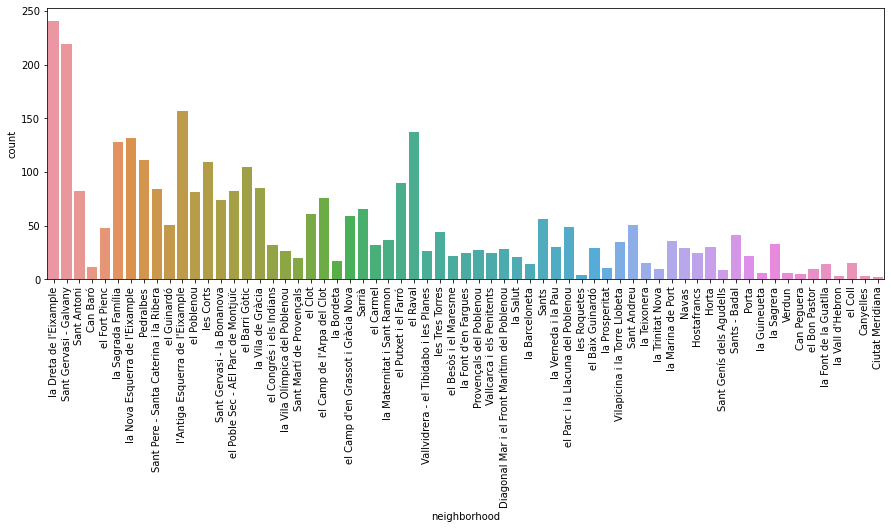

In [ ]:
print(base['neighborhood'].value_counts().tolist())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('neighborhood', data=base)
grafico.tick_params(axis='x', rotation=90)

Podemos observar que há muitas vizinhanças, para melhorar um pouco nossa base de dados vamos agrupar as vizinhanças com menos de 10 representantes em uma nova categoria "Others"

['el Bon Pastor', 'la Trinitat Nova', 'Sant Genís dels Agudells', 'la Guineueta', 'Verdun', 'Can Peguera', 'les Roquetes', "la Vall d'Hebron", 'Canyelles', 'Ciutat Meridiana']
la Dreta de l'Eixample                          241
Sant Gervasi - Galvany                          219
l'Antiga Esquerra de l'Eixample                 157
el Raval                                        137
la Nova Esquerra de l'Eixample                  132
la Sagrada Família                              128
Pedralbes                                       111
les Corts                                       109
el Barri Gòtic                                  105
el Putxet i el Farró                             90
la Vila de Gràcia                                85
Sant Pere - Santa Caterina i la Ribera           84
el Poble Sec - AEI Parc de Montjuïc              82
Sant Antoni                                      82
el Poblenou                                      81
el Camp de l'Arpa del Clot                  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



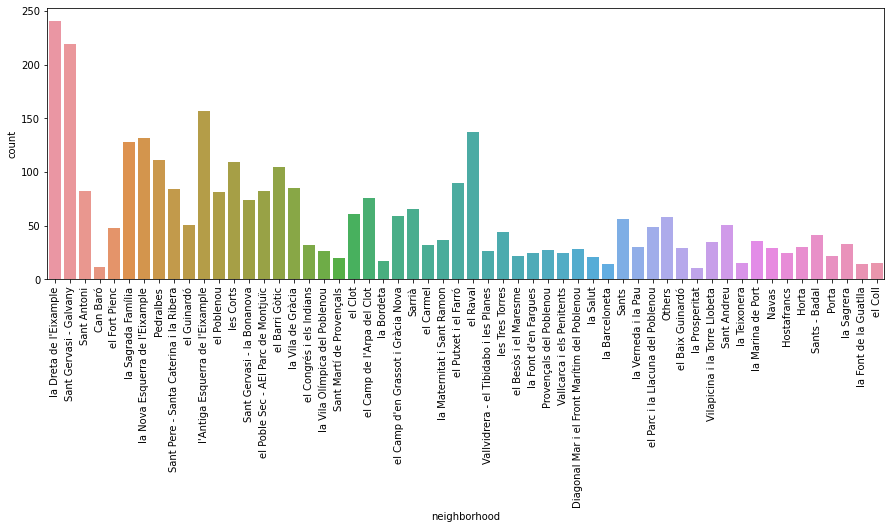

In [ ]:
tabela_tipos = base['neighborhood'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos.index:
    if tabela_tipos[tipo] <= 10:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base.loc[base['neighborhood']==tipo, 'neighborhood'] = 'Others'

print(base['neighborhood'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('neighborhood', data=base)
grafico.tick_params(axis='x', rotation=90)

##Condição

good condition    1355
needs refurb      1328
new                582
Name: condition, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



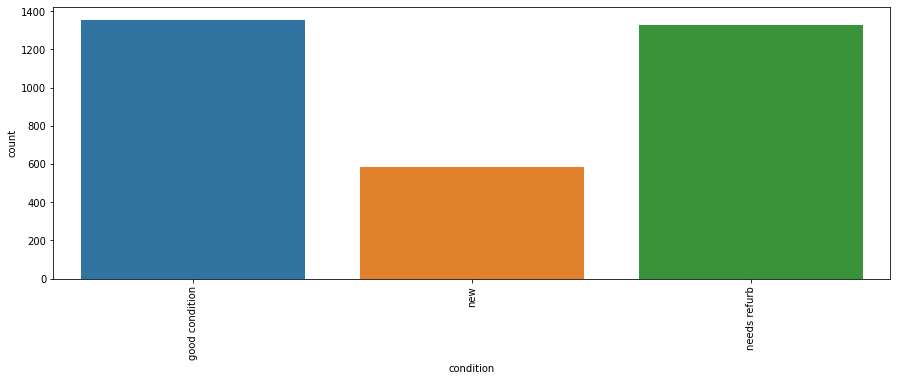

In [ ]:
print(base['condition'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('condition', data=base)
grafico.tick_params(axis='x', rotation=90)

Podemos observar que há apenas 3 confições possíveis, portanto podemos trocar os textos dessa coluna por números, com 0 simbolizando "needs refurb", 1 simbolizando "good condition" e 2 simbolizando "new"

In [ ]:
base.loc[base['condition']=='needs refurb', 'condition'] = 0
base.loc[base['condition']=='good condition', 'condition'] = 1
base.loc[base['condition']=='new', 'condition'] = 2
base['condition']

0       1
1       1
2       1
3       1
4       1
       ..
3260    0
3261    0
3262    0
3263    0
3264    0
Name: condition, Length: 3265, dtype: object

##Tipo

Flat             2751
Penthouse         262
Duplex            108
Detached           55
House              54
Terraced           22
Semi-detached      12
Rustic              1
Name: type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



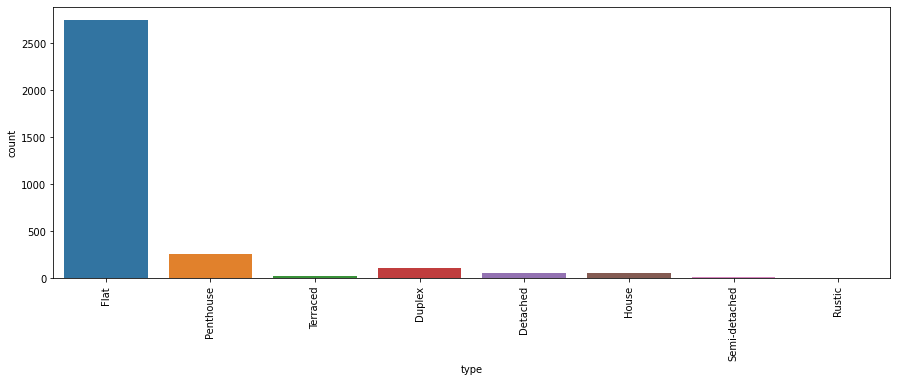

In [ ]:
print(base['type'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('type', data=base)
grafico.tick_params(axis='x', rotation=90)

Podemos observar que temos alguns tipos muito pouco significativos, portanto vamos agrupar todos os tipos que possuam menos que 50 representantes em um novo tipo chamado "others"

['Terraced', 'Semi-detached', 'Rustic']
Flat         2751
Penthouse     262
Duplex        108
Detached       55
House          54
Others         35
Name: type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



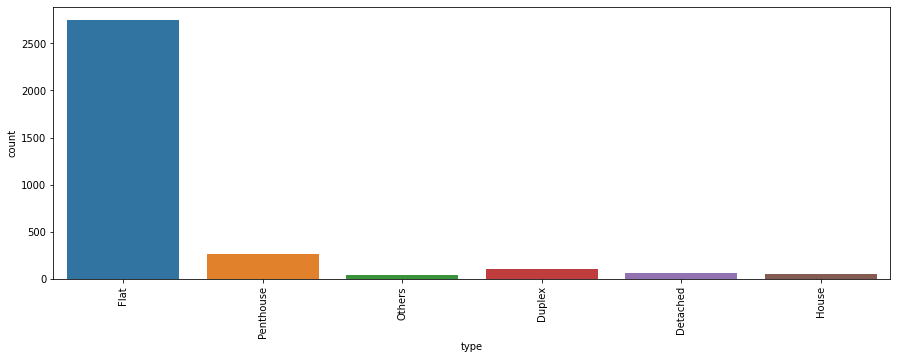

In [ ]:
tabela_tipos = base['type'].value_counts()
colunas_agrupar = []

for tipo in tabela_tipos.index:
    if tabela_tipos[tipo] < 50:
        colunas_agrupar.append(tipo)
print(colunas_agrupar)

for tipo in colunas_agrupar:
    base.loc[base['type']==tipo, 'type'] = 'Others'

print(base['type'].value_counts())
plt.figure(figsize=(15, 5))
grafico = sns.countplot('type', data=base)
grafico.tick_params(axis='x', rotation=90)

##Elevador

Yes    2727
No      538
Name: lift, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



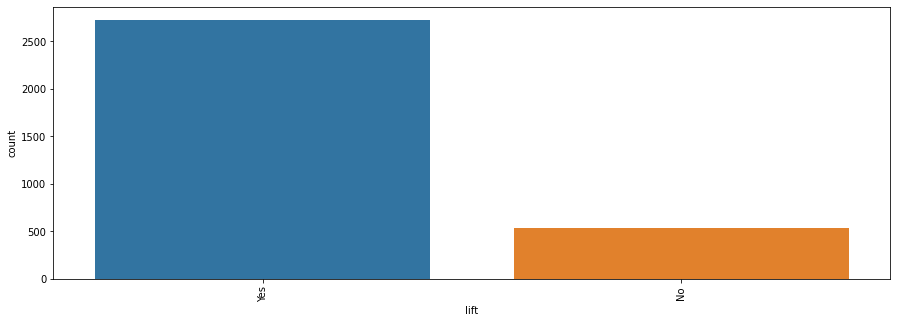

In [ ]:
print(base['lift'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('lift', data=base)
grafico.tick_params(axis='x', rotation=90)

Podemos observar que essa coluna é simplesmente sim ou não, logo podendo ser representada por 0 ou 1

In [ ]:
base.loc[base['lift']=='No', 'lift'] = 0
base.loc[base['lift']=='Yes', 'lift'] = 1
base['lift']

0       1
1       1
2       1
3       1
4       0
       ..
3260    1
3261    0
3262    1
3263    0
3264    0
Name: lift, Length: 3265, dtype: object

##Vista

exterior    3098
interior     167
Name: views, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



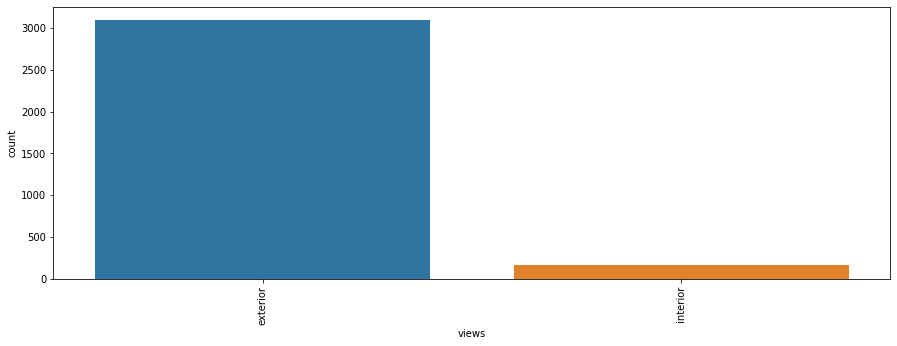

In [ ]:
print(base['views'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('views', data=base)
grafico.tick_params(axis='x', rotation=90)

Podemos observar que essa coluna pode assumir apenas 2 tipos, interior ou exterior, portanto vamos trocar esses valores por 0 ou 1

In [ ]:
base.loc[base['views']=='exterior', 'views'] = 0
base.loc[base['views']=='interior', 'views'] = 1
base['views']

0       0
1       0
2       0
3       0
4       0
       ..
3260    0
3261    0
3262    0
3263    0
3264    0
Name: views, Length: 3265, dtype: object

##Piso

 floor 1        681
 floor 2        588
 floor 3        452
 floor 4        385
 floor 5        259
ground floor    236
 floor 6        160
mezzanine       146
Multiple        144
 floor 7         86
 floor 8         66
 floor 9         27
 floor 10        16
 floor 14         7
 floor 12         3
 floor 11         3
 floor 16         2
 floor 25         2
 floor 21         1
 floor 19         1
Name: floor, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



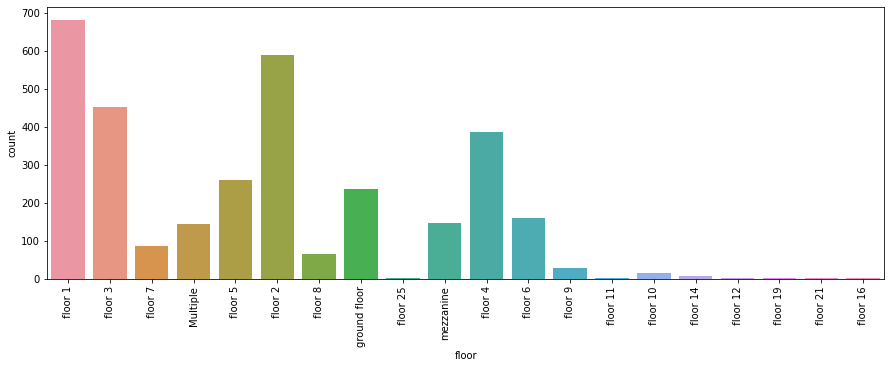

In [ ]:
print(base['floor'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('floor', data=base)
grafico.tick_params(axis='x', rotation=90)

Podemos mudar os valores dessa coluna para o número do andar propriamente dito, por exemplo em vez de ser "floor 1" ser apenas 1.
Devemos tomar cuidado com os 3 tipos especiais que temos nessa coluna, são eles "ground floor", "mezzanine" e "Multiple", mas já trataremos eles, vamos primeiro fazer os casos padrão

In [ ]:
for i in range(1,26):
  name = ' floor '+str(i)
  base.loc[base['floor']==name, 'floor'] = i

1               681
2               588
3               452
4               385
5               259
ground floor    236
6               160
mezzanine       146
Multiple        144
7                86
8                66
9                27
10               16
14                7
12                3
11                3
16                2
25                2
19                1
21                1
Name: floor, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



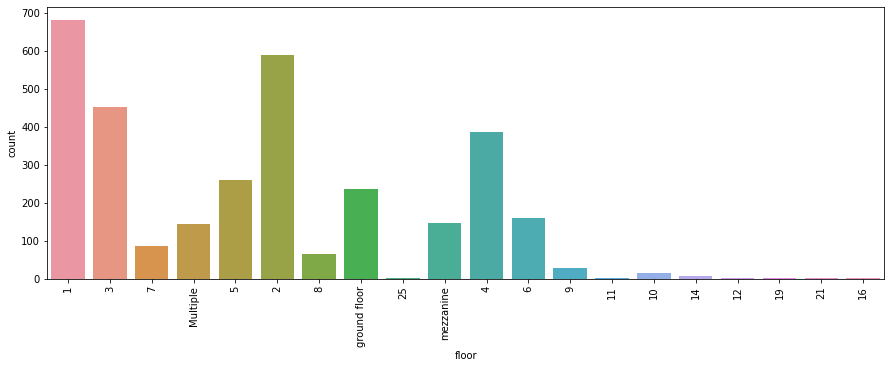

In [ ]:
print(base['floor'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('floor', data=base)
grafico.tick_params(axis='x', rotation=90)

Porém podemos observar que há muito poucos exemplos de andares maiores que 10, portanto podemos agrupa-los na categoria 11 que agora repesenta "11+"

In [ ]:
for i in range(11,26):
  base.loc[base['floor']==i, 'floor'] = 11

1               681
2               588
3               452
4               385
5               259
ground floor    236
6               160
mezzanine       146
Multiple        144
7                86
8                66
9                27
11               19
10               16
Name: floor, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



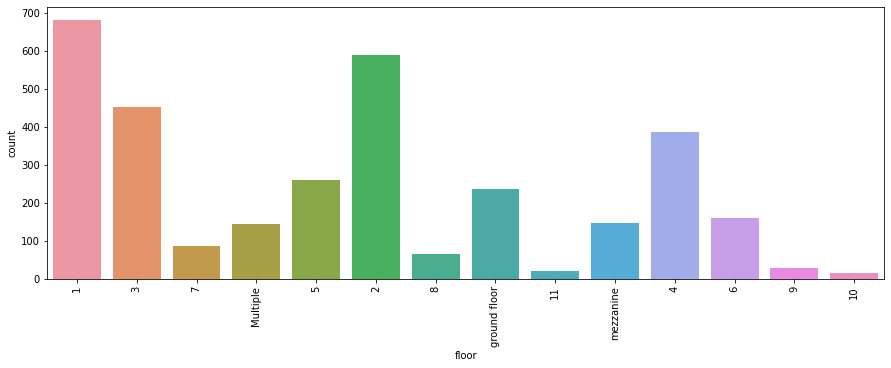

In [ ]:
print(base['floor'].value_counts())

plt.figure(figsize=(15, 5))
grafico = sns.countplot('floor', data=base)
grafico.tick_params(axis='x', rotation=90)

Agora fica fácil lidar com os valores especiais, basta considerar o "ground floor" como 0,o "mezzanine" como 12 e o "Multiple" como 13

In [ ]:
base.loc[base['floor']=='ground floor', 'floor'] = 0
base.loc[base['floor']=='mezzanine', 'floor'] = 12
base.loc[base['floor']=='Multiple', 'floor'] = 13
print(base['floor'].value_counts())

1     681
2     588
3     452
4     385
5     259
0     236
6     160
12    146
13    144
7      86
8      66
9      27
11     19
10     16
Name: floor, dtype: int64


#Ajustando base de dados

Agora vamos pegar os 3 tipos de dados que ainda estão como texto e vamos utilizar o método de encoding de variáveis dummies

In [ ]:
colunas_categorias = ['type','district', 'neighborhood']
base = pd.get_dummies(data=base, columns=colunas_categorias)
display(base.head())

,condition,rooms,area_m2,lift,views,floor,prices,type_Detached,type_Duplex,type_Flat,type_House,type_Others,type_Penthouse,district_Ciutat Vella,district_Eixample,district_Gràcia,district_Horta-Guinardó,district_Les Corts,district_Nou Barris,district_Sant Andreu,district_Sant Martí,district_Sants-Montjuïc,district_Sarrià-Sant Gervasi,neighborhood_Can Baró,neighborhood_Diagonal Mar i el Front Marítim del Poblenou,neighborhood_Horta,neighborhood_Hostafrancs,neighborhood_Navas,neighborhood_Others,neighborhood_Pedralbes,neighborhood_Porta,neighborhood_Provençals del Poblenou,neighborhood_Sant Andreu,neighborhood_Sant Antoni,neighborhood_Sant Gervasi - Galvany,neighborhood_Sant Gervasi - la Bonanova,neighborhood_Sant Martí de Provençals,neighborhood_Sant Pere - Santa Caterina i la Ribera,neighborhood_Sants,neighborhood_Sants - Badal,neighborhood_Sarrià,neighborhood_Vallcarca i els Penitents,neighborhood_Vallvidrera - el Tibidabo i les Planes,neighborhood_Vilapicina i la Torre Llobeta,neighborhood_el Baix Guinardó,neighborhood_el Barri Gòtic,neighborhood_el Besòs i el Maresme,neighborhood_el Camp d'en Grassot i Gràcia Nova,neighborhood_el Camp de l'Arpa del Clot,neighborhood_el Carmel,neighborhood_el Clot,neighborhood_el Coll,neighborhood_el Congrés i els Indians,neighborhood_el Fort Pienc,neighborhood_el Guinardó,neighborhood_el Parc i la Llacuna del Poblenou,neighborhood_el Poble Sec - AEI Parc de Montjuïc,neighborhood_el Poblenou,neighborhood_el Putxet i el Farró,neighborhood_el Raval,neighborhood_l'Antiga Esquerra de l'Eixample,neighborhood_la Barceloneta,neighborhood_la Bordeta,neighborhood_la Dreta de l'Eixample,neighborhood_la Font d'en Fargues,neighborhood_la Font de la Guatlla,neighborhood_la Marina de Port,neighborhood_la Maternitat i Sant Ramon,neighborhood_la Nova Esquerra de l'Eixample,neighborhood_la Prosperitat,neighborhood_la Sagrada Família,neighborhood_la Sagrera,neighborhood_la Salut,neighborhood_la Teixonera,neighborhood_la Verneda i la Pau,neighborhood_la Vila Olímpica del Poblenou,neighborhood_la Vila de Gràcia,neighborhood_les Corts,neighborhood_les Tres Torres
0,1,3,351,1,0,1,2300000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,5,298,1,0,3,1750000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,90,1,0,7,590000,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,130,1,0,1,450000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3,110,0,0,13,430000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#Separando as entradas das saidas

In [ ]:
x_geral = base.drop(columns=['prices'])
x_geral

,condition,rooms,area_m2,lift,views,floor,type_Detached,type_Duplex,type_Flat,type_House,type_Others,type_Penthouse,district_Ciutat Vella,district_Eixample,district_Gràcia,district_Horta-Guinardó,district_Les Corts,district_Nou Barris,district_Sant Andreu,district_Sant Martí,district_Sants-Montjuïc,district_Sarrià-Sant Gervasi,neighborhood_Can Baró,neighborhood_Diagonal Mar i el Front Marítim del Poblenou,neighborhood_Horta,neighborhood_Hostafrancs,neighborhood_Navas,neighborhood_Others,neighborhood_Pedralbes,neighborhood_Porta,neighborhood_Provençals del Poblenou,neighborhood_Sant Andreu,neighborhood_Sant Antoni,neighborhood_Sant Gervasi - Galvany,neighborhood_Sant Gervasi - la Bonanova,neighborhood_Sant Martí de Provençals,neighborhood_Sant Pere - Santa Caterina i la Ribera,neighborhood_Sants,neighborhood_Sants - Badal,neighborhood_Sarrià,neighborhood_Vallcarca i els Penitents,neighborhood_Vallvidrera - el Tibidabo i les Planes,neighborhood_Vilapicina i la Torre Llobeta,neighborhood_el Baix Guinardó,neighborhood_el Barri Gòtic,neighborhood_el Besòs i el Maresme,neighborhood_el Camp d'en Grassot i Gràcia Nova,neighborhood_el Camp de l'Arpa del Clot,neighborhood_el Carmel,neighborhood_el Clot,neighborhood_el Coll,neighborhood_el Congrés i els Indians,neighborhood_el Fort Pienc,neighborhood_el Guinardó,neighborhood_el Parc i la Llacuna del Poblenou,neighborhood_el Poble Sec - AEI Parc de Montjuïc,neighborhood_el Poblenou,neighborhood_el Putxet i el Farró,neighborhood_el Raval,neighborhood_l'Antiga Esquerra de l'Eixample,neighborhood_la Barceloneta,neighborhood_la Bordeta,neighborhood_la Dreta de l'Eixample,neighborhood_la Font d'en Fargues,neighborhood_la Font de la Guatlla,neighborhood_la Marina de Port,neighborhood_la Maternitat i Sant Ramon,neighborhood_la Nova Esquerra de l'Eixample,neighborhood_la Prosperitat,neighborhood_la Sagrada Família,neighborhood_la Sagrera,neighborhood_la Salut,neighborhood_la Teixonera,neighborhood_la Verneda i la Pau,neighborhood_la Vila Olímpica del Poblenou,neighborhood_la Vila de Gràcia,neighborhood_les Corts,neighborhood_les Tres Torres
0,1,3,351,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,5,298,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2,90,1,0,7,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,2,130,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,3,110,0,0,13,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3260,0,1,64,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3261,0,3,99,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3262,0,4,127,1,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3263,0,3,64,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_geral = base['prices']
y_geral

0       2300000
1       1750000
2        590000
3        450000
4        430000
         ...   
3260     295000
3261     420000
3262     545000
3263     170000
3264     178800
Name: prices, Length: 3265, dtype: int64